<a href="https://colab.research.google.com/github/conextm/python/blob/main/M4_Clase_5_Validaci%C3%B3n_Cruzada_Selecci%C3%B3n_de_Caractericas__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M4 - Clase 5
## Validación Cruzada (Cross-Validation) y Selección de Características

**Objetivo**:

1. Implementar técnicas de validación cruzada
2. Implementar técnicas de selección de caracteristicas
3. Combinar las técnicas aprendidas con modelos supervisados aprendidos (Regresión Logistica y Árbol de Decisión)

## Importamos Librerias y Cargamos la base de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
# Cargamos base de datos
iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)
#Variables independientes y Variables dependientes
X.shape, y.shape

((150, 4), (150,))

In [ ]:
# Nombres a columnas
X = pd.DataFrame(X)
X.columns = list(iris.feature_names)
y = pd.DataFrame(y)
y.columns = ['Flor']

- Visualización de nuestras bases:

In [ ]:
X.head(3), y.head(3)

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2,
    Flor
 0     0
 1     0
 2     0)

En la variable objetivo:

- 0: Tipo de iris "setosa"
- 1: Tipo de iris "versicolor"
- 2: Tipo de iris "virginica"

### ANTES DE CONTINUAR, es importante que conozcamos las siguientes metricas que nos permiten evaluar los modelos.

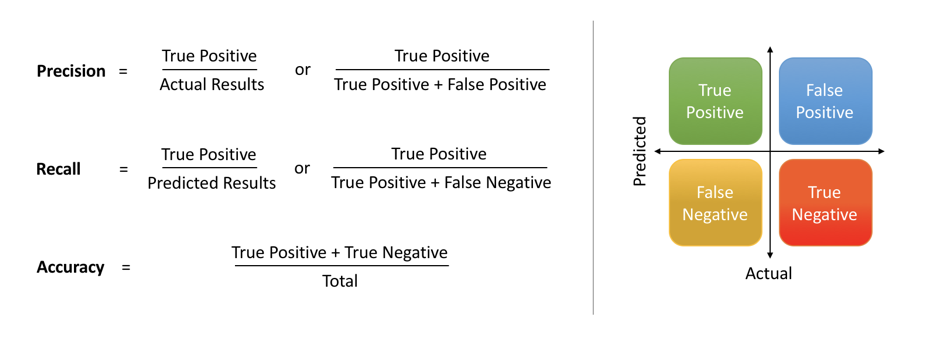

## Modelos

Hoy vamos a utlizar dos modelos:
* Máquina de vectores de soporte (para ilustrar validación cruzada y selección de características)
* Árbol de decisión (clasificación multinomial)

## Método normal (Entrenamiento - Prueba)
### Sin utilización de validación cruzada

In [ ]:
# Entrenamiento 70% y testeo 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modelo
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Precision: tp/tp+fp
clf.score(X_test, y_test)

0.9777777777777777

**La precisión del modelo es del 97%** ¿Como lo analizaría, de acuerdo al diagrama anteriormente presentado?

In [ ]:
# Predicción
pred = clf.predict(X_test)

In [ ]:
# Precision: tp/tp+fp
# Recall : tp/tp + fn
# Accuracy: tp + fn / (tp + fp + fn + tn)
# f1-score: 2* ((precision*Recall)/(precision+recall))
print(metrics.classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      1.000     0.944     0.971        18
           2      0.917     1.000     0.957        11

    accuracy                          0.978        45
   macro avg      0.972     0.981     0.976        45
weighted avg      0.980     0.978     0.978        45



**Analicemos lo anterior**

- Matriz de confusión

In [ ]:
print(metrics.confusion_matrix(y_test, pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


- Otra forma de visualización

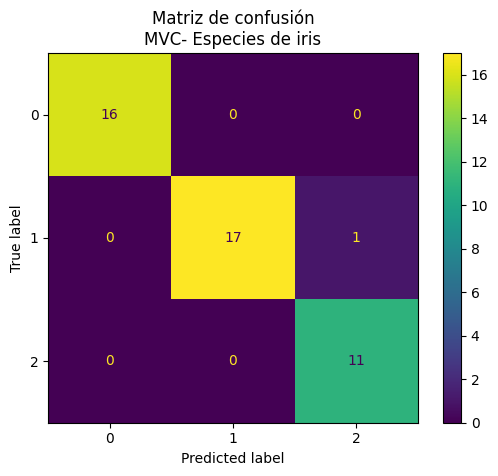

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, pred), display_labels = ['0','1','2'])
cm_display.plot()
plt.title("Matriz de confusión\nMVC- Especies de iris")
plt.show()

## Utilizando la metodologia de validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Modelo
clf = svm.SVC(kernel='linear',random_state=42)

In [ ]:
scores = cross_val_score(clf, X, y, cv=7)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
scores

array([0.95454545, 1.        , 0.95454545, 0.95238095, 0.95238095,
       1.        , 1.        ])

In [ ]:
print("%0.2f accuracy con desviación de %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy con desviación de 0.02


**No obtuvimos cambios significativos, validamos el resultado**

## Selección de características

Utilizaremos el paquete ´SelectKBest´ para seleccionar las mejores características. Es importante resaltar que usted deberá seleccionar el número. Ejemplo: Las 3 mejores variables

In [ ]:
# Importamos nuestros paquetes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [ ]:
# K hace referencia a nuestras variables
# Utilizamos chi2 en nuestra medición
seleccion = SelectKBest(score_func=chi2, k=3)
z = seleccion.fit_transform(X,y)

**Para tener en cuenta:** Si vamos a ejecutar modelos de regresión, cambiaremos el parámetro score_func=f_regression

In [ ]:
# Seleccionamos las variables más importantes
filtro = seleccion.get_support()
caracteristicas = np.array(iris.feature_names)

In [ ]:
print('----------------------------------------------------')
print('Las variables más importantes son: ')
print('----------------------------------------------------')
top = list(caracteristicas[filtro])
top

----------------------------------------------------
Las variables más importantes son: 
----------------------------------------------------


['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

- Ahora, utilicemos las variables más importantes ejecutando nuevamente el módelo:

**Sin validación cruzada**

In [ ]:
# Entrenamiento 70% y testeo 30%
X_train, X_test, y_train, y_test = train_test_split(X[top], y, test_size=0.3, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
## Precision: tp/tp+fp
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9777777777777777

**Con validación cruzada**

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear',random_state=42)
scores = cross_val_score(clf, X[top], y, cv=7)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([0.95454545, 1.        , 0.95454545, 1.        , 0.9047619 ,
       1.        , 1.        ])

In [ ]:
print("%0.2f accuracy con desviación de %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy con desviación de 0.03


## Árbol de decisión
**Recapitulemos lo anterior con el clasificador que vimos ayer**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

### Entrenamiento, prueba, validación

#### 1. Entrenamos con los datos 70-30

In [ ]:
# Partimos de las bases X_train, X_test, y_train, y_test

In [ ]:
arbolDecision = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [ ]:
arbolDecision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

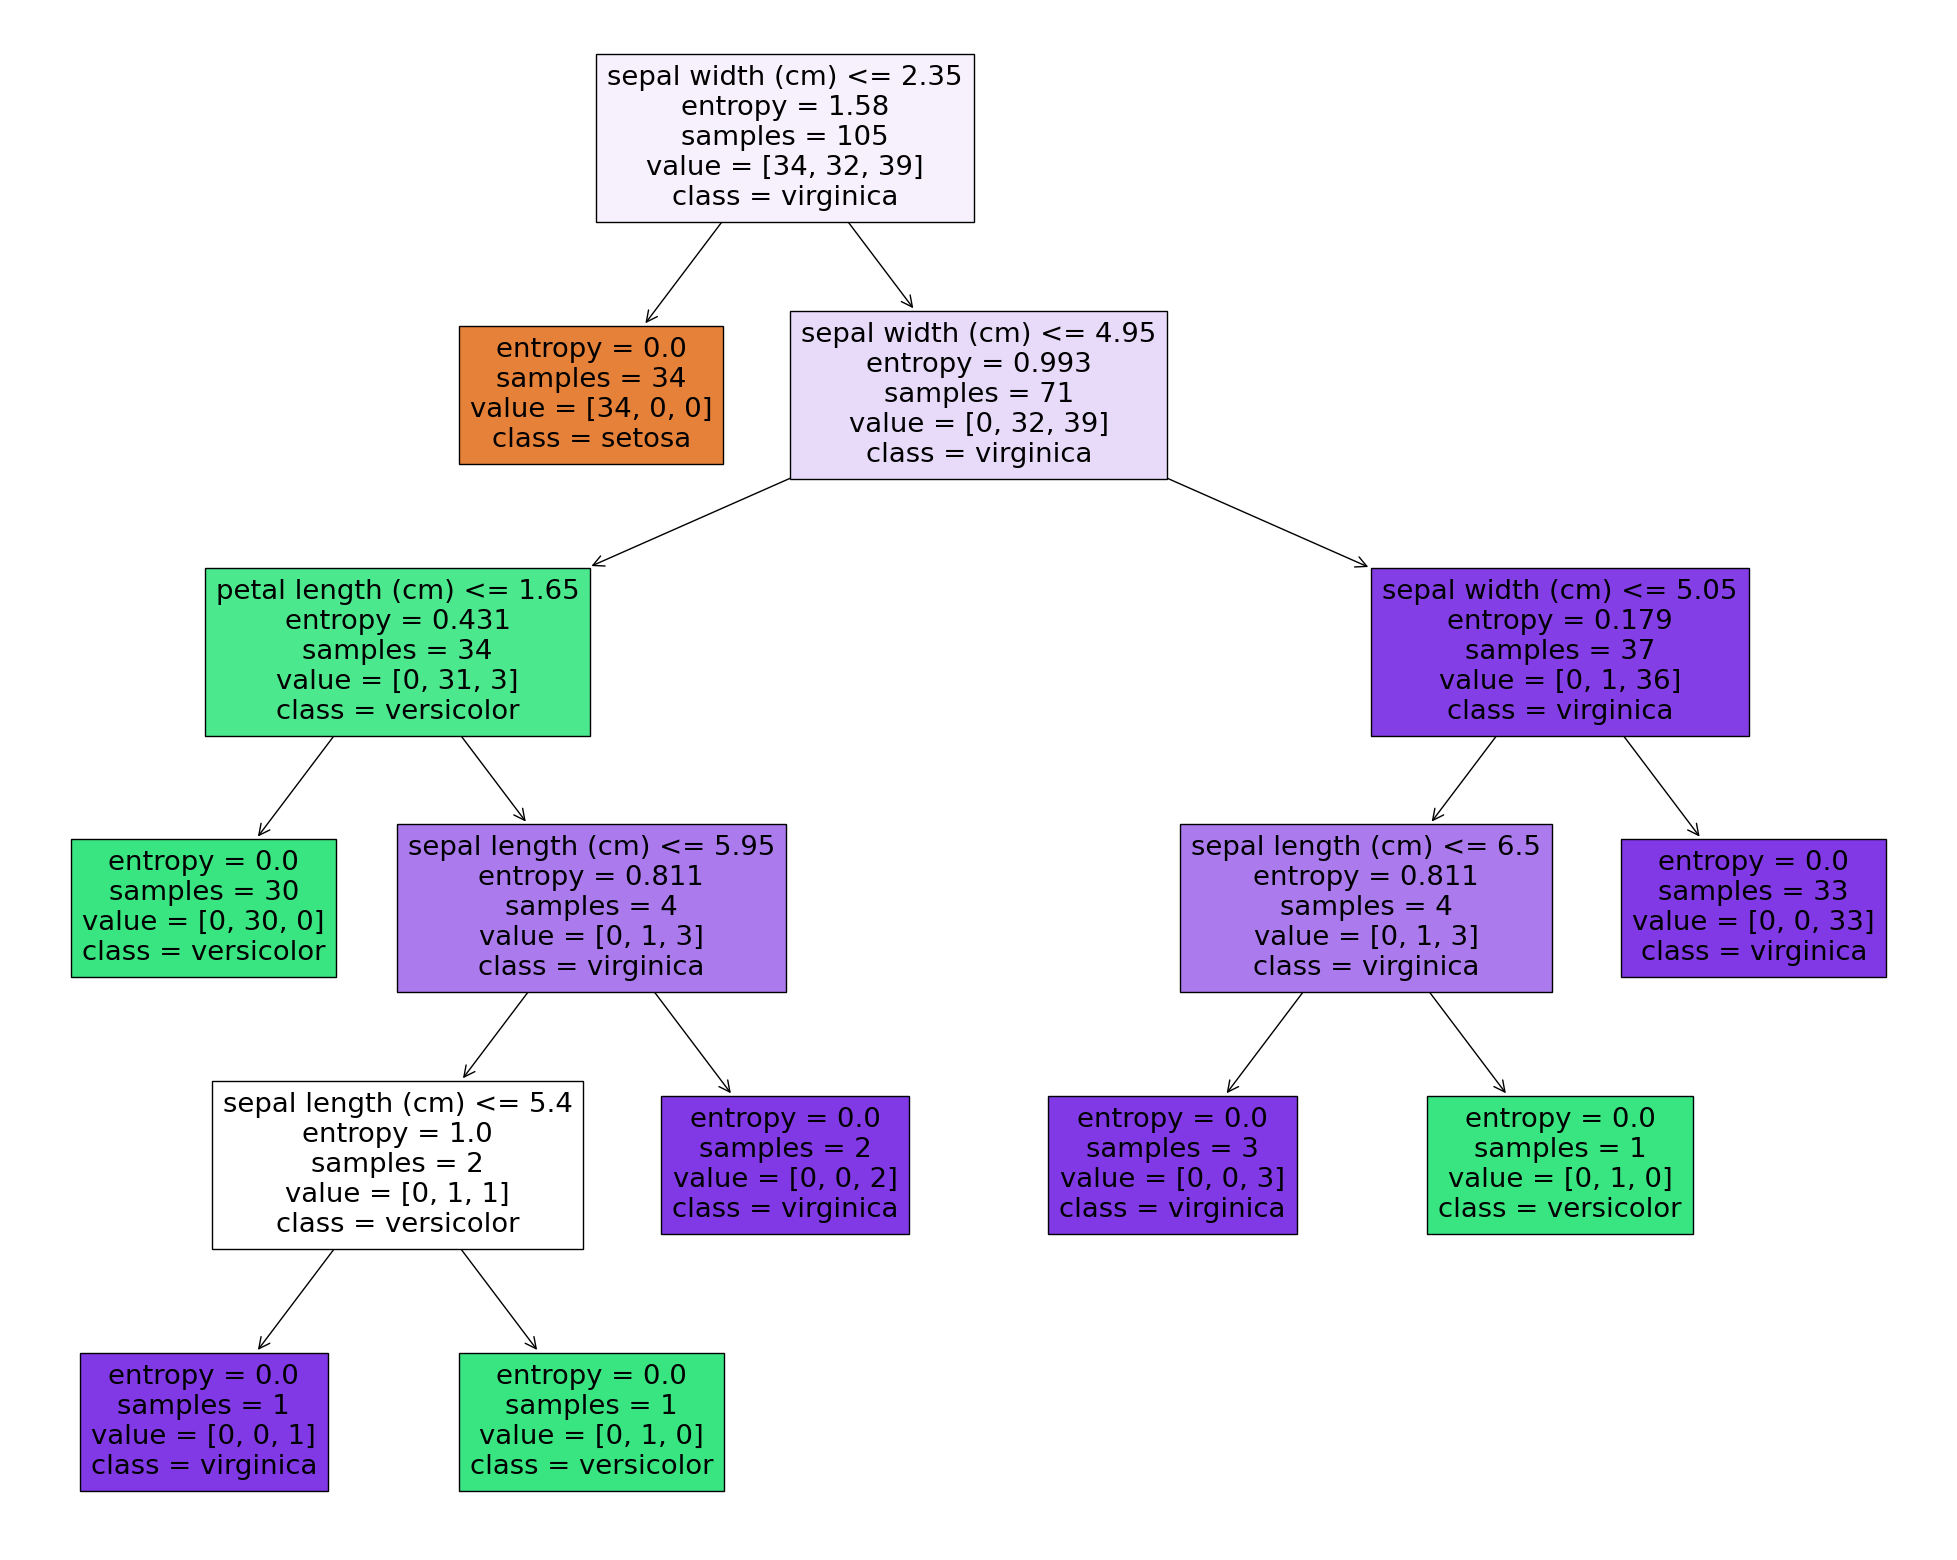

In [ ]:
class_names = ['setosa', 'versicolor', 'virginica']

figArbol = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arbolDecision,
                   feature_names=X.columns,
                   class_names=class_names,
                   filled=True)

#### 2. Predecimos con los datos de prueba

In [ ]:
y_pred = arbolDecision.predict(X_test)

#### 3. Métricas de precisión

In [ ]:
# Model Accuracy, ¿Qué tan frecuentemente el modelo predice correctamente?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


**OBSERVEMOS**: Entrenemos el modelo una vez más pero reduzcamos max_depth a 3.</br>
¿Qué cambio vemos en la precisión? No siempre un modelo más detallado generaliza mejor (overfitting/sobreajuste).

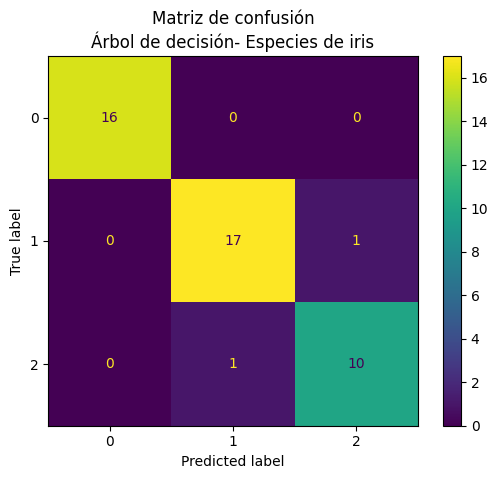

In [ ]:
matriz_confusion = metrics.confusion_matrix(y_test, y_pred)

matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['0','1','2'])
matriz.plot()
plt.title("Matriz de confusión\nÁrbol de decisión- Especies de iris")
plt.show()

#### 4. Validación cruzada

In [ ]:
scores = cross_val_score(arbolDecision, X, y, cv=7)

In [ ]:
scores

array([0.95454545, 0.95454545, 0.90909091, 0.80952381, 0.95238095,
       1.        , 1.        ])

In [ ]:
print("%0.2f accuracy promedio con desviación de %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy promedio con desviación de 0.06


**UNA VEZ MÁS**: Notemos que el modelo con máximo nivel de profundidad 3 generaliza mejor que el modelo con máximo 10 niveles de profundidad.

-----------

## Ejercicio

**Contexto:** Estamos buscando predecir la probabilidad de que una persona tenga cancer de seno, mediante características que son extraidas de una imagen digitalizada.

Para conocer más de la base, puede consultar en: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
df_pronostico = pd.read_csv(r'data.csv')

In [ ]:
y = df_pronostico['diagnosis']

In [ ]:
# B:Beningno
# M:Maligno
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Siguientes pasos:**

**1.** Seleccione las mejores características.

**2.** Genere un modelo sin validación cruzada.

**3.** Genere un modelo con validación cruzada.

**4.** Concluya y de sus recomendaciones.